### Add this shared folder to your google drive
 https://drive.google.com/drive/folders/1kZ1gCnpfU0BnpdU47pLM_TQ6RypDDqgw?usp=sharing 

### Mount your google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Clone the code from Github which will help us to do DeepFake

In [ ]:
!git clone https://github.com/AliaksandrSiarohin/first-order-model

Cloning into 'first-order-model'...
remote: Enumerating objects: 379, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 379 (delta 33), reused 38 (delta 17), pack-reused 312
Receiving objects: 100% (379/379), 72.18 MiB | 15.52 MiB/s, done.
Resolving deltas: 100% (196/196), done.


### Move inside the clonned project directory

In [ ]:
cd first-order-model

/content/first-order-model


### Set the path of shared folder which we added on drive

In [ ]:
path="/content/drive/MyDrive/first-order-motion-model/"

### Load Sample Image and Video

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")
# Change the file name and video link 
#source_image = imageio.imread(path+'got-07.png')
source_image = imageio.imread(path+'got-08.png')
driving_video = imageio.mimread(path+'00.mp4')


#Resize image and video to 256x256

source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

def display(source, driving, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = [source]
        cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani

def display_only_final_video(source, driving, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = []
        cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani
    

HTML(display(source_image, driving_video).to_html5_video())

In [ ]:
import numpy as np
import cv2
import os
 
width = 128
height = 720
channel = 3
 
fps = 30
sec = 5
 
# Syntax: VideoWriter_fourcc(c1, c2, c3, c4) # Concatenates 4 chars to a fourcc code
#  cv2.VideoWriter_fourcc('M','J','P','G') or cv2.VideoWriter_fourcc(*'MJPG)
 
fourcc = cv2.VideoWriter_fourcc(*'MP42') # FourCC is a 4-byte code used to specify the video codec.
# A video codec is software or hardware that compresses and decompresses digital video. 
# In the context of video compression, codec is a portmanteau of encoder and decoder, 
# while a device that only compresses is typically called an encoder, and one that only 
# decompresses is a decoder. Source - Wikipedia
 
#Syntax: cv2.VideoWriter( filename, fourcc, fps, frameSize )
video = cv2.VideoWriter('test.mp4', fourcc, float(fps), (width, height))
 
for frame_count in range(fps*sec):
    img = np.random.randint(0,255, (height, width, channel), dtype = np.uint8)
    video.write(img)
 
video.release()

### Load Checkpoints

In [ ]:
!pip install ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=0e496707574a8a67ef428f25302282b117e7f9559ee9d115d50d27ae75461cee
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [ ]:
from demo import load_checkpoints
generator, kp_detector = load_checkpoints(config_path='config/vox-256.yaml',
                                          checkpoint_path=path+'vox-cpk.pth.tar')

### Make Animation with given Video and Image

In [ ]:
from demo import make_animation
from skimage import img_as_ubyte

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True)

#save  video
imageio.mimsave('../result.mp4', [img_as_ubyte(frame) for frame in predictions])
#video can be downloaded from /content 
HTML(display(source_image, driving_video, predictions).to_html5_video())

  0%|          | 0/265 [00:00<?, ?it/s]

In [ ]:
HTML(display_only_final_video(driving_video,predictions).to_html5_video())

#Convert DeepFakeVideo to Images

In [ ]:
#to-do

# MesoNet

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [ ]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}

In [ ]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [ ]:
# Create a MesoNet class using the Classifier

class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [ ]:
# Instantiate a MesoNet model with pretrained weights
meso = Meso4()
meso.load('/content/drive/MyDrive/MesoNet/python-youtube-code-master/Deepfake-detection/weights/Meso4_DF')

In [ ]:
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_directory(
    '/content/drive/MyDrive/MesoNet_Dataset',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [ ]:
# Checking class assignment
generator.class_indices

{'Fake': 0, 'Real': 1}

1/1 [==============================] - 1s 777ms/step
Predicted likelihood: 0.9121
Actual label: 0
1/1 [==============================] - 0s 25ms/step

Correct prediction: False


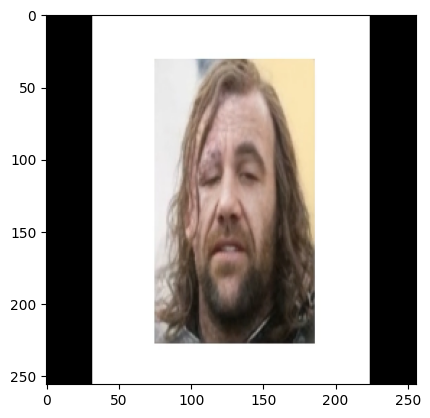

In [ ]:
# Rendering image X with label y for MesoNet
X, y = generator.next()

# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));

In [ ]:
# Creating separate lists for correctly classified and misclassified images
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

In [ ]:
# Generating predictions on validation set, storing in separate lists
for i in range(len(generator.labels)):
    
    # Loading next picture, generating prediction
    X, y = generator.next()
    pred = meso.predict(X)[0][0]
    
    # Sorting into proper category
    if round(pred)==y[0] and y[0]==1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred)==y[0] and y[0]==0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0]==1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)   
        
    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')
    
    if i == len(generator.labels)-1:
        print("All", len(generator.labels), "predictions completed")

1/1 [==============================] - 0s 19ms/step
0  predictions completed.
1/1 [==============================] - 0s 20ms/step
All 16 predictions completed


In [ ]:
def plotter(images,preds):
    fig = plt.figure(figsize=(16,9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i,j in enumerate(subset):
        fig.add_subplot(3,4,i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show;
    return

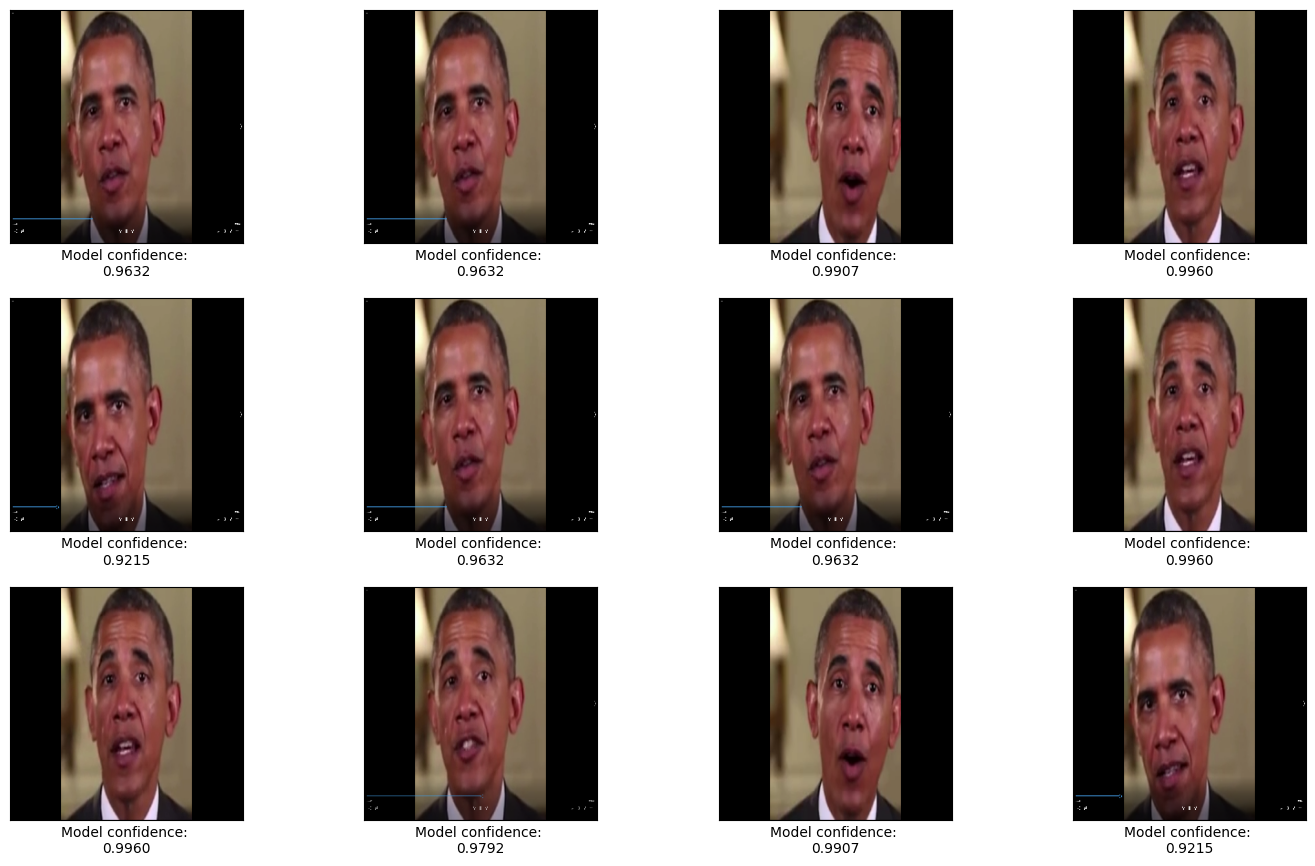

In [ ]:
plotter(correct_real, correct_real_pred)

In [ ]:
plotter(misclassified_real, misclassified_real_pred)

ValueError: ignored

<Figure size 1600x900 with 0 Axes>

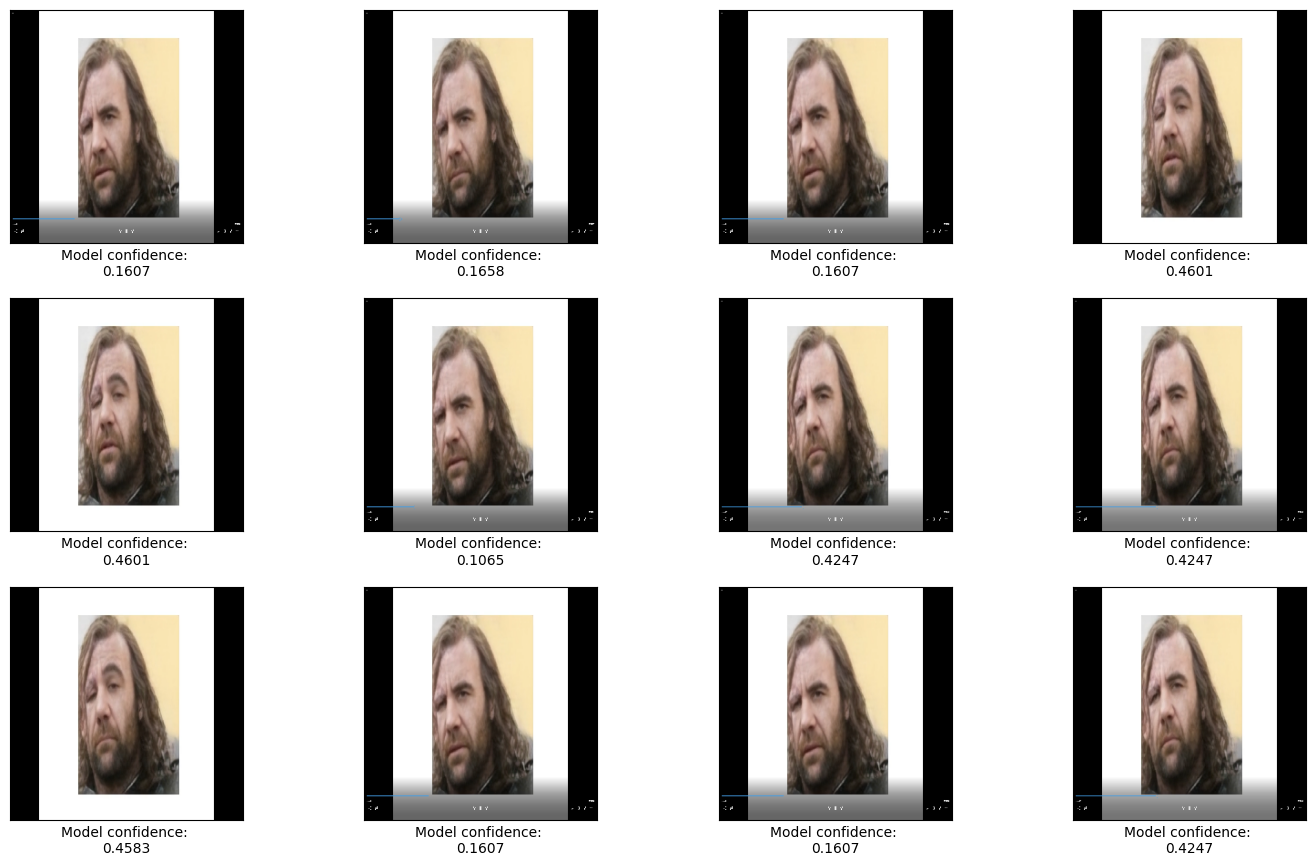

In [ ]:
plotter(correct_deepfake, correct_deepfake_pred)

In [ ]:
accuracy = (len(correct_real)+len(correct_deepfake))/len(generator.labels)

In [ ]:
accuracy

0.875